# Velocity obstacle

In [14]:
import sys
sys.path.append('../')
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.ORCA import VO
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


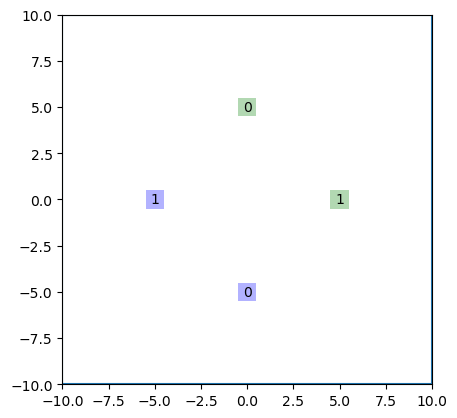

In [15]:

start_locs = np.array([[0,-5],[-5,0]])
goal_locs = np.array([[0,5],[5,0]])


start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]

goals = [box_2d_center(g,goal_box_side) for g in goal_locs]


limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 


env = NavigationEnv(limits,[],starts,goals)

draw_env(env)

In [17]:
vmax = 1.0
bloating_r = 2.0
tau = 7
pa, pb = start_locs[0], start_locs[1]


xlim = (-2,0)
ylim = (0,2)

ra = rb = bloating_r
vopt_a, vopt_b = vmax * (goal_locs - start_locs)/np.linalg.norm(goal_locs - start_locs)

vo = VO(pa,pb,ra,rb,tau)


nx = 100
ny = 100
xv,yv = np.meshgrid(np.linspace(*xlim,nx),np.linspace(*ylim,ny))
test_pt = np.vstack([xv.flatten(),yv.flatten()]).T


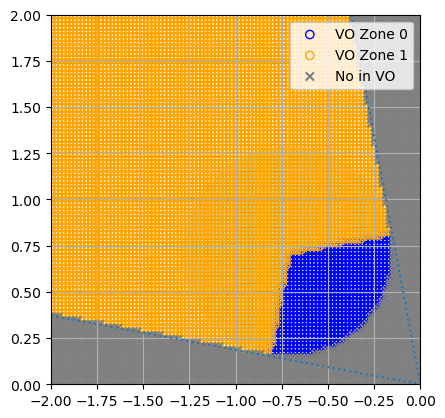

In [19]:
plt.figure()
ax = plt.gca()

xlim = (-2,0)
ylim = (0,2)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

vo.visualize(ax)

zone_code = vo.zones(test_pt)

mk = ['o','o','x']

color = ['blue','orange','grey']

labels = ['VO Zone 0','VO Zone 1','No in VO']

for z in [0,1,2]:

    ax.scatter(test_pt[zone_code == z,0],test_pt[zone_code == z,1]\
               ,marker=mk[z],fc='none',ec=color[z],label = labels[z])

plt.legend(loc='upper right')
plt.show()